In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [38]:
orders=pd.read_csv("C:/Users/mirah/OneDrive/GITHUB/data download/product_orders.csv")

In [39]:
orders

,product_id,order_id,quantity,unit_price
0,1,3,5,72.69
1,1,25,4,63.59
2,1,59,3,22.07
3,1,68,4,196.11
4,1,71,5,227.35
...,...,...,...,...
980,85,175,2,64.25
981,85,189,4,294.40
982,85,272,4,177.33
983,85,282,3,73.52


In [40]:
products=pd.read_csv("C:/Users/mirah/OneDrive/GITHUB/data download/products.csv")

In [41]:
products

,product_id,product_name,product_type
0,1,Reflector oven,oven
1,2,Convection microwave,oven
2,3,Pressure fryer,fryer
3,4,Multicooker,cooker
4,5,Food steamer,steamer
...,...,...,...
59,78,Stove,oven
60,80,Earth oven,oven
61,82,Electric cooker,cooker
62,84,Espresso machine,coffee


In [42]:
# Perform a left join
products_orders= pd.merge(products, orders, on='product_id', how='left')

In [43]:
products_orders

,product_id,product_name,product_type,order_id,quantity,unit_price
0,1,Reflector oven,oven,3,5,72.69
1,1,Reflector oven,oven,25,4,63.59
2,1,Reflector oven,oven,59,3,22.07
3,1,Reflector oven,oven,68,4,196.11
4,1,Reflector oven,oven,71,5,227.35
...,...,...,...,...,...,...
728,85,Coffee pot,coffee,175,2,64.25
729,85,Coffee pot,coffee,189,4,294.40
730,85,Coffee pot,coffee,272,4,177.33
731,85,Coffee pot,coffee,282,3,73.52


In [44]:
# Check for missing values
print(products_orders.isnull().sum())

product_id      0
product_name    0
product_type    0
order_id        0
quantity        0
unit_price      0
dtype: int64


In [45]:
# if any, use this imputation or drop the data with missing values
# imputation with mean value
products_orders['quantity'].fillna(products_orders['quantity'].mean(), inplace=True)
products_orders['unit_price'].fillna(products_orders['unit_price'].mean(), inplace=True)

# drop rows with missing values in other columns
products_orders.dropna(subset=['product_id', 'product_name', 'product_type', 'order_id'], inplace=True)

In [47]:
# check for duplicates
print(products_orders.duplicated().sum())

0


In [48]:
# remove duplicates based on all columns (keeping the first occurrence)
products_orders.drop_duplicates(inplace=True)

In [49]:
products_orders

,product_id,product_name,product_type,order_id,quantity,unit_price
0,1,Reflector oven,oven,3,5,72.69
1,1,Reflector oven,oven,25,4,63.59
2,1,Reflector oven,oven,59,3,22.07
3,1,Reflector oven,oven,68,4,196.11
4,1,Reflector oven,oven,71,5,227.35
...,...,...,...,...,...,...
728,85,Coffee pot,coffee,175,2,64.25
729,85,Coffee pot,coffee,189,4,294.40
730,85,Coffee pot,coffee,272,4,177.33
731,85,Coffee pot,coffee,282,3,73.52


In [51]:
#total sales for every order id
products_orders['total_price']=products_orders['quantity']*products_orders['unit_price']

In [52]:
products_orders.head()

,product_id,product_name,product_type,order_id,quantity,unit_price,total_price
0,1,Reflector oven,oven,3,5,72.69,363.45
1,1,Reflector oven,oven,25,4,63.59,254.36
2,1,Reflector oven,oven,59,3,22.07,66.21
3,1,Reflector oven,oven,68,4,196.11,784.44
4,1,Reflector oven,oven,71,5,227.35,1136.75


In [54]:
# total sales per product
product_sales = products_orders.groupby('product_type')['total_price'].sum().reset_index()
print(product_sales)

   product_type  total_price
0        cooker      8795.26
1        coffee      9284.04
2        cooker     69293.15
3         fryer     23904.59
4         grill      5513.85
5       grinder      3887.98
6        heater      9989.64
7          oven    119216.64
8       roaster      6649.50
9     specialty     70707.55
10     specialy      4372.74
11      steamer      8578.02


In [55]:
#sort total price descending
product_sales_sorted=product_sales.sort_values(by='total_price', ascending=False)
print(product_sales_sorted)

   product_type  total_price
7          oven    119216.64
9     specialty     70707.55
2        cooker     69293.15
3         fryer     23904.59
6        heater      9989.64
1        coffee      9284.04
0        cooker      8795.26
11      steamer      8578.02
8       roaster      6649.50
4         grill      5513.85
10     specialy      4372.74
5       grinder      3887.98


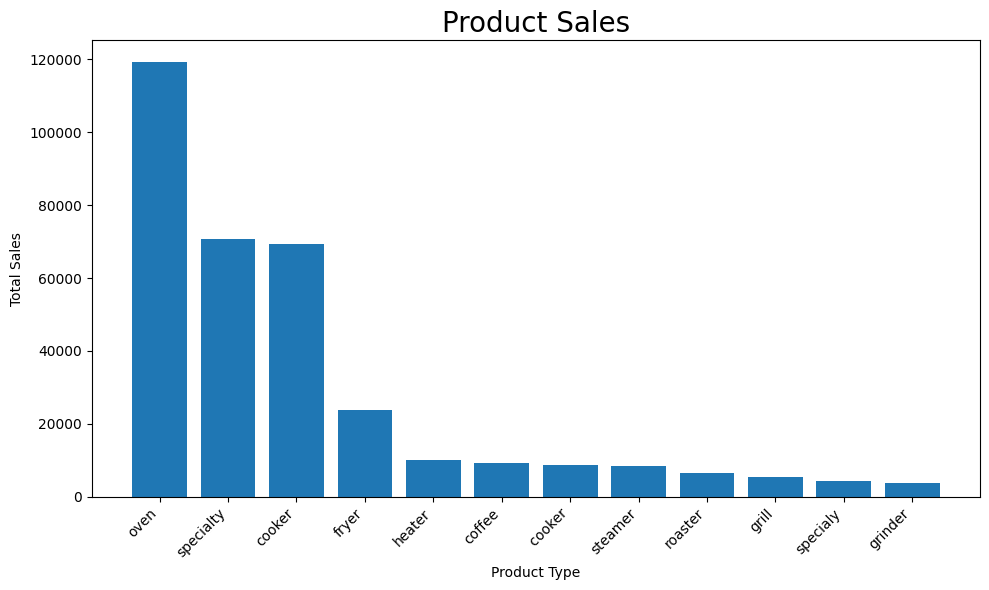

In [60]:
# create a bar chart to visualize product sales
plt.figure(figsize=(10, 6))  # set the size of the plot (optional)

plt.bar(product_sales_sorted['product_type'], product_sales_sorted['total_price'])
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.title('Product Sales', fontsize=20)

plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for better readability
plt.tight_layout()

plt.show()